In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [48]:
train_df = pd.read_csv("/content/train-small.csv")
valid_df = pd.read_csv("/content/valid-small.csv")
test_df = pd.read_csv("/content/test.csv")

train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [44]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(1000, 16)
(200, 16)
(420, 16)


In [45]:
# Verify no leakage between the test set and others

def check_for_leakage(df1, df2, patient_col):
    df1_patients_unique = set(df1[[patient_col]].squeeze())
    df2_patients_unique = set(df2[[patient_col]].squeeze())
    patients_in_both_groups = list(df1_patients_unique.intersection(df2_patients_unique))
    leakage = len(patients_in_both_groups) != 0
    return leakage

print("leakage between train and valid: {}".format(check_for_leakage(train_df, valid_df, 'PatientId')))
print("leakage between train and test: {}".format(check_for_leakage(train_df, test_df, 'PatientId')))
print("leakage between valid and test: {}".format(check_for_leakage(valid_df, test_df, 'PatientId')))

leakage between train and valid: True
leakage between train and test: False
leakage between valid and test: False


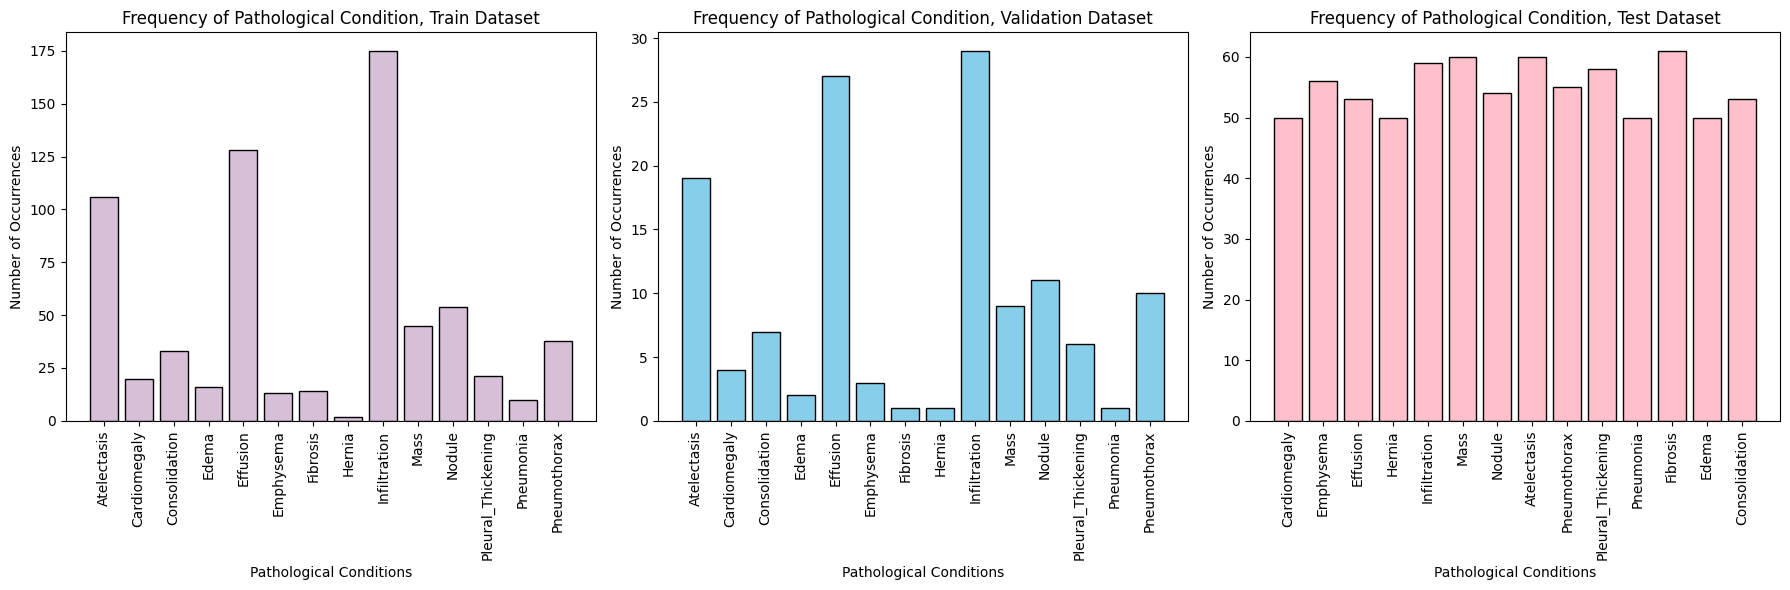

In [49]:
train_df.drop(columns=['Image', 'PatientId'], inplace=True)
valid_df.drop(columns=['Image', 'PatientId'], inplace=True)
test_df.drop(columns=['Image', 'PatientId'], inplace=True)

dfs = [train_df, valid_df, test_df]
titles = ['Frequency of Pathological Condition, Train Dataset', 'Frequency of Pathological Condition, Validation Dataset',
          'Frequency of Pathological Condition, Test Dataset']
colors = ['#D8BFD8', 'skyblue', 'pink']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, df in enumerate(dfs):
    occurrences = df.sum()
    axes[i].bar(occurrences.index, occurrences.values, color=colors[i], edgecolor='black')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Pathological Conditions')
    axes[i].set_ylabel('Number of Occurrences')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()